<h2>Fake News Detection</h2>

<h3> Project Description </h3>
This project intends to hopefully a series of models that accurately predict the authenticity of the news articles. In this jupyter notebook, we will walk you through the typical data life cycle from data pre-processing to model validation. A wide range of machine learning algorithms have been displayed along with their effect on differing sample sizes. 

In [ ]:
# Importing required modules
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import seaborn as sns
import re
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

<h3>Mounting Drive</h3>
I had to mount google drive in order to directly access the training and testing datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''
real_df=pd.read_csv("/content/drive/My Drive/CSCE489/True.csv")
fake_df=pd.read_csv("/content/drive/My Drive/CSCE489/Fake.csv")
print(real_df.shape)
print(fake_df.shape)
print(real_df.head())
print(fake_df.head())
# We begin by merging both these separate dataframes into one unified dataframe
#news_df=pd.concat([real_df, fake_df], axis=0).reset_index(drop=True)

# Ratio 1:4
# news_df=pd.concat([fake_df[0:5356],real_df], axis=0).reset_index(drop=True)
news_df=pd.concat([fake_df,real_df], axis=0).reset_index(drop=True)

# We are shuffling the given dataset to introduce randomness by removing structured ordering of two classes
news_df = news_df.sample(frac=1).reset_index(drop=True)
news_df

news_df.to_csv('test_final.csv')
from google.colab import files
files.download("test_final.csv")
'''

In [ ]:
news_df=pd.read_csv("/content/drive/My Drive/CSCE489/test_final.csv")
del news_df['Unnamed: 0']
news_df

,Title,Text,Subject,Date,Label
0,North Carolina Republicans Lose As Federal Ap...,Republican racists in North Carolina just got ...,News,29-Jul-16,0
1,Obamacare exploding? Maybe just a slow burn,NEW YORK/WASHINGTON (Reuters) - U.S. President...,politicsNews,25-Mar-17,1
2,Kissinger says impressed by China's 'calm reac...,NEW YORK (Reuters) - Former U.S. Secretary of ...,politicsNews,5-Dec-16,1
3,Saudi Arabia tightens security after Bahrain p...,DUBAI (Reuters) - Saudi Arabia s energy minist...,worldnews,11-Nov-17,1
4,Donald Trump Is Destroying The Country’s Repu...,"During the election, when Donald Trump wasn t ...",News,17-Nov-17,0
...,...,...,...,...,...
44853,U.S. slated to sell $375 million of emergency ...,WASHINGTON (Reuters) - The U.S. government is ...,politicsNews,10-Dec-16,1
44854,Melania Trump And Heidi Cruz Finally Get Toge...,Someone we haven t heard a lot from during the...,News,1-Jun-16,0
44855,Analysis Shows Hillary Clinton’s Plans Would ...,As the Democratic National Convention wrapped ...,News,29-Jul-16,0
44856,BELGIUM’S POLITICAL LEADER Michaël Modrikamen ...,"This video was published on March 11, 2016, ex...",Government News,22-Mar-16,0


In [ ]:
# Displaying the dataset shape
print("Dataset Size: ",news_df.shape)

Dataset Size:  (44858, 5)


In [ ]:
# This proves that our dataset has no missing/null values
news_df.notnull().sum()

Title      44858
Text       44858
Subject    44858
Date       44858
Label      44858
dtype: int64

<h2> A: Data Pre-Processing </h2>
<p> In the section below we will be cleaning the data by inspecting and removing NaN values, stopwords and special characters from our previously obtained news dataset. We will also be manipulating the data to repurpose it for our further applications.</p>

In [ ]:
#news_df['Input Text']=news_df['Title']+" "+news_df['Text'][5:]
print(news_df['Title'][10])
print(news_df['Text'][10])


print("*******************")
#news_df['Input Text'][10]

BOOM! Trump Allows Pro-Illegal Alien Heckler To Ask Question, Then Destroys Her With This Response [VIDEO]
Performances like the one in the video below by Trump in NH, are why people are lining up for hours to see him appear at his rallies Businessman Donald Trump OWNED a heckler today at his sold-out event in New Hampshire.There were so many people at the rally reporters were locked out and there was a line of cars stretching outside the city limits. Illegal immigrants are the backbone of our country? I don t think so, darling,  Donald J. Trump responded to a heckler who interrupted his campaign rally.  You know what the backbone of our country [is]? People that came here, and they came here legally. People that came here to this country legally, and they worked their ass off, and they made this country great. Via: GP
*******************


In [ ]:
messages=news_df.copy()
lem_word=WordNetLemmatizer()
post_lem = []

for i in range(0, len(messages)):
    # Eg. "Libya puts 142 migrants on plane back to Guinea"
    temp1 = re.sub('[^a-zA-Z]', ' ', messages['Title'][i])
    temp2 = re.sub('[^a-zA-Z]', ' ', messages['Text'][i])
    # Eg. "Libya puts     migrants on plane back to Guinea"
    temp1 = temp1.lower()
    temp2 = temp2.lower()
    # Eg. "libya puts     migrants on plane back to guinea"
    temp1 = temp1.split()
    temp2 = temp2.split()[2:]
    # Eg. ['libya', 'puts', 'migrants', 'on', 'plane', 'back', 'to', 'guinea']

    # MERGING TITLE AND INPUT TEXT
    temp=temp1+temp2
    filtered=[]
    for word in temp:
        if ((word not in stopwords.words('english')) and (word!='reuters')):
            filtered+=[lem_word.lemmatize(word)]
            
    # Eg. ['libya', 'put', 'migrant', 'plane', 'back', 'guinea']    
    temp3=filtered
    temp3 = ' '.join(temp3)
    
    # Eg. "libya put migrant plane back guinea"
    post_lem.append(temp3)
#corpus


In [ ]:
# Displaying the transformed dataset shape
print("Tranformed Dataset Size: ",news_df.shape)

Tranformed Dataset Size:  (44858, 5)


<h3> Inspecting Input </h3>
In the following cells, we will be taking a closer look at the pre-processed text datasets

In [ ]:
print("Original Dataframe Length", news_df.shape[0])
#print("Stemmed Dataset Length: ",len(post_stem))
print("Lemmatized Dataset Length:",len(post_lem))
#print("Input", post_lem)

In [ ]:
#RUNTIME Marking
#10:24am
#11:46am - CHECKPOINT SAVED
# I COMMENTED THE STEMMED LINE BECAUSE I COMMENTED THE STEM ARRAY ON THE PREVIOUS THING

print("**************************** ORIGINAL TEXT ***********************")
print(news_df['Text'][0])

#print("\n**************************** STEMMED TEXT ***********************")
#print(post_stem[10])

print("\n**************************** LEMMATIZED TEXT ***********************")
print(post_lem[0])


**************************** ORIGINAL TEXT ***********************
Republican racists in North Carolina just got their asses handed to them by the United States 4th Circuit Court of Appeals.In 2013, Republicans abused their power in North Carolina by passing a law designed to keep them in power by suppressing the votes of minorities and young people by requiring they bring voter identification. The law also cut early voting, ended same day registration, and heavily restricted pre-registration of young voters. It has been the most draconian anti-voting law in the country, and has drawn massive protests ever since.Critics of the law challenged it s constitutionality in court, only to see the district court rule against them. But now a federal appeals court has not only reversed the lower court s decision, it slammed them. In holding that the legislature did not enact the challenged provisions with discriminatory intent, the court seems to have missed the forest in carefully surveying the

<h3>Vector Conversion </h3>
In the section below, we will be converting the text based dataset into a vector form for our model using CountVectorizer, Tf-Idf and Word2Vec.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,2), max_features=40000)
count_vec = cv.fit_transform(post_lem)

In [ ]:
print("Count Vectorizer Shape: ",count_vec.shape,"\n")

df = pd.DataFrame(count_vec[1000].T.todense(), index=cv.get_feature_names(), columns=["Count"])
df = df.sort_values('Count', ascending=False)
print (df.head(25))

Count Vectorizer Shape:  (44858, 40000) 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


                  Count
muslim               37
business              7
together              7
toronto               6
need                  6
change                5
living                5
islamic               5
people                5
sharia                5
law                   4
imam                  4
work                  4
help                  4
lot                   4
one                   4
number                4
community             4
work together         4
people living         4
sure                  3
find                  3
need help             3
infidel               3
muslim community      3


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfIdfVectorizer=TfidfVectorizer(ngram_range=(1,2), max_features=40000)
tfIdf_vec = tfIdfVectorizer.fit_transform(post_lem)

In [ ]:
print("TfIdf Vectorizer Shape: ",tfIdf_vec.shape,"\n")

df = pd.DataFrame(tfIdf_vec[1000].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df.head(25))

TfIdf Vectorizer Shape:  (44858, 40000) 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


                    TF-IDF
muslim            0.629392
toronto           0.225995
sharia            0.159850
imam              0.140734
people living     0.139549
together          0.132675
sikh              0.130097
work together     0.118687
infidel           0.115300
islamic law       0.111965
business          0.109586
living            0.105680
need help         0.101252
muslim community  0.101153
islamic           0.095847
owned business    0.082485
without approval  0.082485
together one      0.080403
cab               0.080171
need              0.080158
alberta           0.079291
thousand muslim   0.078100
one area          0.077732
change            0.076893
truck driver      0.076867


In [ ]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 40000,
 'min_df': 1,
 'ngram_range': (1, 2),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
tfIdfVectorizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 40000,
 'min_df': 1,
 'ngram_range': (1, 2),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [ ]:
# Storing the output labels
labels=messages['Label']

[link text](https://)<h3>Training and Testing Preparation</h3>
In the following section, we will be splitting the dataset using train_test_split.

In [ ]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(tfIdf_vec, labels, test_size=0.35, random_state=0)
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(count_vec, labels, test_size=0.35, random_state=0)

In [ ]:
# CONVERTING TO ARRAY NOT REASONABLE GIVEN SPACE RESTRICTIONS
X_train[10].todense()[0]

matrix([[0., 0., 0., ..., 0., 0., 0.]])

<h2>B: Training Models</h2>
In the section below, we will be training a whole range of machine learning algorithms.

<h4>I - Random Forest Classifier</h4>

In [ ]:
# LABELS: 1-True News <=> 0-Fake News
from sklearn.ensemble import RandomForestClassifier

# TfIdf Vectorizer
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train)

# Count Vectorizer
model2 = RandomForestClassifier(n_estimators=100)
model2.fit(X_train_c, Y_train_c)

y_pred = model.predict(X_test)
y_pred_c = model2.predict(X_test_c)
#print("Random Forest:",accuracy_score(y_pred4, Y_test))

In [ ]:
#2:00 => 
# Count Vec: 0.94
# TfIdf Vec: 0.95
#tfIdfVec
from sklearn.metrics import accuracy_score
print("Random Forest")
score1=accuracy_score(y_pred, Y_test)
score2=accuracy_score(y_pred_c, Y_test_c)
print("tfIdf Vectorizer: ",score1)
print("Count Vectorizer: ",score2)



Random Forest
tfIdf Vectorizer:  0.9847780396153111
Count Vectorizer:  0.9852875613018279


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
map1=confusion_matrix(Y_test, y_pred)
map2=confusion_matrix(Y_test_c, y_pred_c)

Random Forest Classifier - tfIdfVectorizer
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      8171
           1       0.98      0.99      0.98      7530

    accuracy                           0.98     15701
   macro avg       0.98      0.98      0.98     15701
weighted avg       0.98      0.98      0.98     15701



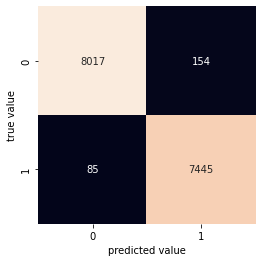

In [ ]:
# POST - NGRAM (1,2) + 25000 feature limit
print("Random Forest Classifier - tfIdfVectorizer")
print(classification_report(Y_test, y_pred))
sns.heatmap(map1, square=True, annot=True, cbar=False, fmt='')


plt.xlabel('predicted value')
plt.ylabel('true value');


Random Forest Classifier - Count Vectorizer
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      8171
           1       0.98      0.99      0.98      7530

    accuracy                           0.99     15701
   macro avg       0.99      0.99      0.99     15701
weighted avg       0.99      0.99      0.99     15701



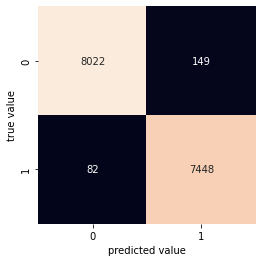

In [ ]:
print("Random Forest Classifier - Count Vectorizer")
print(classification_report(Y_test_c,y_pred_c))
sns.heatmap(map2, square=True, annot=True, cbar=False, fmt='')
plt.xlabel('predicted value')
plt.ylabel('true value');

<h4>II - Passive Aggressive Classifier</h4>

In [ ]:
# Count Vec: 0.9930
# tfIdf Vec: 0.9933
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=2)
linear_clf_c = PassiveAggressiveClassifier(n_iter_no_change=2)

linear_clf.fit(X_train, Y_train)
linear_clf_c.fit(X_train_c, Y_train_c)

pred = linear_clf.predict(X_test)
pred_c=linear_clf_c.predict(X_test_c)

score3 = accuracy_score(Y_test, pred)
score4 = accuracy_score(Y_test_c,pred_c)
print("tfIdf Vectorizer - PassiveAggressive: ",score3)
print("Count Vectorizer - PassiveAggressive: ",score4)

tfIdf Vectorizer - PassiveAggressive:  0.9896184956372206
Count Vectorizer - PassiveAggressive:  0.9863066046748614


PASSIVE AGGRESSIVE - TFIDF VECTORIZER

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8171
           1       0.99      0.99      0.99      7530

    accuracy                           0.99     15701
   macro avg       0.99      0.99      0.99     15701
weighted avg       0.99      0.99      0.99     15701



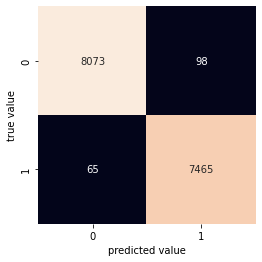

In [ ]:
# Count Vec: 9335-60 <=> 64-8549 ()
print("PASSIVE AGGRESSIVE - TFIDF VECTORIZER\n")
map3=confusion_matrix(Y_test, pred)
print(classification_report(Y_test, pred))
sns.heatmap(map3, square=True, annot=True, cbar=False, fmt='')
plt.xlabel('predicted value')
plt.ylabel('true value');
#classes=['REAL','FAKE']
#tick_marks = np.arange(len(classes))
#plt.xticks(tick_marks, classes, horizontalalignment="center")
#plt.yticks(tick_marks, classes)

PASSIVE AGGRESSIVE - COUNT VECTORIZER

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8171
           1       0.98      0.99      0.99      7530

    accuracy                           0.99     15701
   macro avg       0.99      0.99      0.99     15701
weighted avg       0.99      0.99      0.99     15701



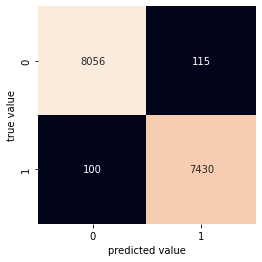

In [ ]:
print("PASSIVE AGGRESSIVE - COUNT VECTORIZER\n")
map4=confusion_matrix(Y_test_c, pred_c)
print(classification_report(Y_test_c, pred_c))
sns.heatmap(map4, square=True, annot=True, cbar=False, fmt='')
plt.xlabel('predicted value')
plt.ylabel('true value');

<h4> III - Support Vector Classifier </h4>

In [ ]:
from sklearn.svm import SVC
model5=SVC(kernel='linear', gamma='auto')
model5.fit(X_train,Y_train)
pred5=model5.predict(X_test)
model6=SVC(kernel='linear', gamma='auto')
model6.fit(X_train_c,Y_train_c)
pred6=model6.predict(X_test_c)

score5=accuracy_score(Y_test, pred5)
score6=accuracy_score(Y_test_c, pred6)
print("tfIdf Vectorizer - Linear SVM: ",score5)
print("Count Vectorizer - Linear SVM: ",score6)

tfIdf Vectorizer - Linear SVM:  0.988599452264187
Count Vectorizer - Linear SVM:  0.9848417298261257


 Linear SVM - tfIdf VECTORIZER

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8171
           1       0.99      0.99      0.99      7530

    accuracy                           0.99     15701
   macro avg       0.99      0.99      0.99     15701
weighted avg       0.99      0.99      0.99     15701



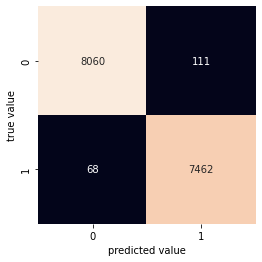

In [ ]:
# 20 minutes
print(" Linear SVM - tfIdf VECTORIZER\n")
map5=confusion_matrix(Y_test, pred5)
print(classification_report(Y_test, pred5))
sns.heatmap(map5, square=True, annot=True, cbar=False, fmt='')
plt.xlabel('predicted value')
plt.ylabel('true value');

 Linear SVM - COUNT VECTORIZER

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      8171
           1       0.98      0.99      0.98      7530

    accuracy                           0.98     15701
   macro avg       0.98      0.98      0.98     15701
weighted avg       0.98      0.98      0.98     15701



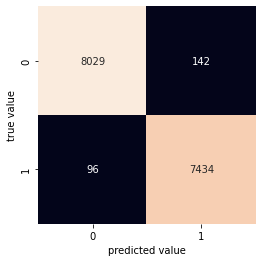

In [ ]:
print(" Linear SVM - COUNT VECTORIZER\n")
map6=confusion_matrix(Y_test_c, pred6)
print(classification_report(Y_test_c, pred6))
sns.heatmap(map6, square=True, annot=True, cbar=False, fmt='')
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
# model7=SVC(kernel='poly')
# model7.fit(X_train,Y_train)
# pred7=model7.predict(X_test)
# score7=accuracy_score(Y_test, pred5)
# print("tfIdf Vectorizer - Poly SVM: ",score7)

In [ ]:
from sklearn.svm import SVC
model8 = SVC(kernel='rbf')
model8.fit(X_train, Y_train)
pred8 = model8.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

score8 = accuracy_score(Y_test, pred8)


model9 = SVC(kernel='rbf')
model9.fit(X_train_c, Y_train_c)
pred9 = model9.predict(X_test_c)
score9 = accuracy_score(Y_test_c, pred9)


print("TfIdf Vectorizer - Rbf Classifier Score: ",score8)
print("Count Vectorizer - Rbf Classifier Score: ",score9)

TfIdf Vectorizer - Rbf Classifier Score:  0.9878988599452264
Count Vectorizer - Rbf Classifier Score:  0.9817209094962104


 RBF SVM - TFidf VECTORIZER

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8171
           1       0.98      0.99      0.99      7530

    accuracy                           0.99     15701
   macro avg       0.99      0.99      0.99     15701
weighted avg       0.99      0.99      0.99     15701



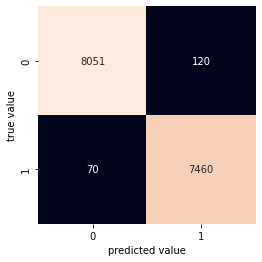

In [ ]:
print(" RBF SVM - TFidf VECTORIZER\n")
map6=confusion_matrix(Y_test, pred8)
print(classification_report(Y_test, pred8))
sns.heatmap(map6, square=True, annot=True, cbar=False, fmt='')
plt.xlabel('predicted value')
plt.ylabel('true value');

 RBF SVM - Count VECTORIZER

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8171
           1       0.98      0.98      0.98      7530

    accuracy                           0.98     15701
   macro avg       0.98      0.98      0.98     15701
weighted avg       0.98      0.98      0.98     15701



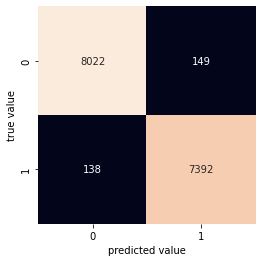

In [ ]:
print(" RBF SVM - Count VECTORIZER\n")
map6=confusion_matrix(Y_test_c, pred9)
print(classification_report(Y_test_c, pred9))
sns.heatmap(map6, square=True, annot=True, cbar=False, fmt='')
plt.xlabel('predicted value')
plt.ylabel('true value');

<h4> IV - Decision Tree Classifier </h4>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model10 = DecisionTreeClassifier()
model10.fit(X_train, Y_train)
pred10 = model10.predict(X_test)
score10 = accuracy_score(Y_test, pred10)

model11 = DecisionTreeClassifier()
model11.fit(X_train_c, Y_train_c)
pred11 = model11.predict(X_test_c)
score11 = accuracy_score(Y_test_c, pred11)

print("TfIdf Vectorizer - Decision Tree Score: ",score10)
print("Count Vectorizer - Decision Tree Score: ",score11)

TfIdf Vectorizer - Decision Tree Score:  0.9554805426405961
Count Vectorizer - Decision Tree Score:  0.9609579007706516


 Decision - tfIdf VECTORIZER

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      8171
           1       0.96      0.95      0.95      7530

    accuracy                           0.96     15701
   macro avg       0.96      0.96      0.96     15701
weighted avg       0.96      0.96      0.96     15701



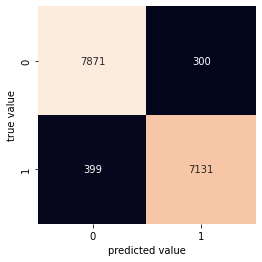

In [ ]:
print(" Decision - tfIdf VECTORIZER\n")
map10=confusion_matrix(Y_test, pred10)
print(classification_report(Y_test, pred10))
sns.heatmap(map10, square=True, annot=True, cbar=False, fmt='')
plt.xlabel('predicted value')
plt.ylabel('true value');

 Decision Tree - Count VECTORIZER

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      8171
           1       0.96      0.95      0.96      7530

    accuracy                           0.96     15701
   macro avg       0.96      0.96      0.96     15701
weighted avg       0.96      0.96      0.96     15701



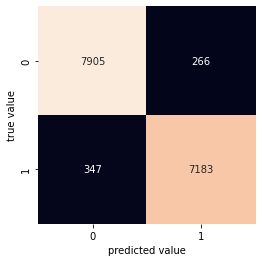

In [ ]:
print(" Decision Tree - Count VECTORIZER\n")
map11=confusion_matrix(Y_test_c, pred11)
print(classification_report(Y_test_c, pred11))
sns.heatmap(map11, square=True, annot=True, cbar=False, fmt='')
plt.xlabel('predicted value')
plt.ylabel('true value');

<h4>V - Naive Bayes: Multinomial and Complement</h4>

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model12 = MultinomialNB()
model12.fit(X_train,Y_train)
pred12 = model12.predict(X_test)
print("TfIdf Vectorizer - Naive Bayes Score:",accuracy_score(Y_test, pred12))

model13 = MultinomialNB()
model13.fit(X_train_c,Y_train_c)
pred13 = model13.predict(X_test_c)
print("Count Vectorizer - Naive Bayes Score:",accuracy_score(Y_test_c, pred13))

TfIdf Vectorizer - Naive Bayes Score: 0.9481561683969174
Count Vectorizer - Naive Bayes Score: 0.9578370804407362


 NB- tfIdf VECTORIZER

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8171
           1       0.95      0.94      0.95      7530

    accuracy                           0.95     15701
   macro avg       0.95      0.95      0.95     15701
weighted avg       0.95      0.95      0.95     15701



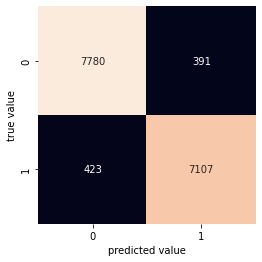

In [ ]:
print(" NB- tfIdf VECTORIZER\n")
map12=confusion_matrix(Y_test, pred12)
print(classification_report(Y_test, pred12))
sns.heatmap(map12, square=True, annot=True, cbar=False, fmt='')
plt.xlabel('predicted value')
plt.ylabel('true value');

 NB - Count VECTORIZER

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8171
           1       0.96      0.95      0.96      7530

    accuracy                           0.96     15701
   macro avg       0.96      0.96      0.96     15701
weighted avg       0.96      0.96      0.96     15701



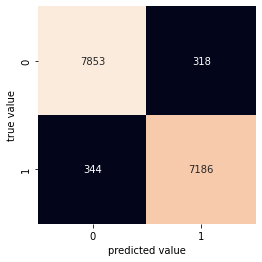

In [ ]:
print(" NB - Count VECTORIZER\n")
map13=confusion_matrix(Y_test_c, pred13)
print(classification_report(Y_test_c, pred13))
sns.heatmap(map13, square=True, annot=True, cbar=False, fmt='')
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()
cnb.fit(X_train,Y_train)
pred_cnb = cnb.predict(X_test)
print("TfIdf Vectorizer - Complement Naive Bayes Score:",accuracy_score(Y_test, pred_cnb))

cnb_2 = ComplementNB()
cnb_2.fit(X_train_c,Y_train_c)
pred_cnb_2 = cnb_2.predict(X_test_c)
print("Count Vectorizer - Complement Naive Bayes Score:",accuracy_score(Y_test_c, pred_cnb_2))

TfIdf Vectorizer - Complement Naive Bayes Score: 0.9486019998726196
Count Vectorizer - Complement Naive Bayes Score: 0.9579007706515509


 CNB- tfIdf VECTORIZER

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8171
           1       0.95      0.95      0.95      7530

    accuracy                           0.95     15701
   macro avg       0.95      0.95      0.95     15701
weighted avg       0.95      0.95      0.95     15701



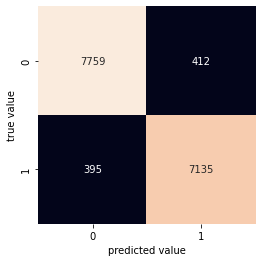

In [ ]:
print(" CNB- tfIdf VECTORIZER\n")
map_cnb=confusion_matrix(Y_test, pred_cnb)
print(classification_report(Y_test, pred_cnb))
sns.heatmap(map_cnb, square=True, annot=True, cbar=False, fmt='')
plt.xlabel('predicted value')
plt.ylabel('true value');

 CNB - Count VECTORIZER

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8171
           1       0.96      0.95      0.96      7530

    accuracy                           0.96     15701
   macro avg       0.96      0.96      0.96     15701
weighted avg       0.96      0.96      0.96     15701



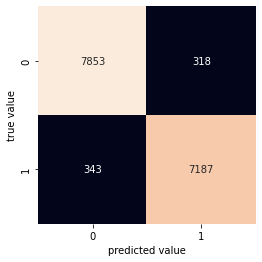

In [ ]:
print(" CNB - Count VECTORIZER\n")
map_cnb_2=confusion_matrix(Y_test_c, pred_cnb_2)
print(classification_report(Y_test_c, pred_cnb_2))
sns.heatmap(map_cnb_2, square=True, annot=True, cbar=False, fmt='')
plt.xlabel('predicted value')
plt.ylabel('true value');

<h4>V - Neural Network</h4>

In [ ]:
from sklearn.neural_network import MLPClassifier
model14 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
model14.fit(X_train, Y_train)
pred14 = model14.predict(X_test)

model15 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
model15.fit(X_train_c, Y_train_c)
pred15 = model15.predict(X_test_c)

print("TfIdf Vectorizer - Neural Network:",accuracy_score(Y_test,pred14))
print("Count Vectorizer - Neural Network:",accuracy_score(Y_test_c,pred15))

TfIdf Vectorizer - Neural Network: 0.5204127125660786
Count Vectorizer - Neural Network: 0.9864976753073053


 NN - tfIdf VECTORIZER

              precision    recall  f1-score   support

           0       0.52      1.00      0.68      8171
           1       0.00      0.00      0.00      7530

    accuracy                           0.52     15701
   macro avg       0.26      0.50      0.34     15701
weighted avg       0.27      0.52      0.36     15701



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


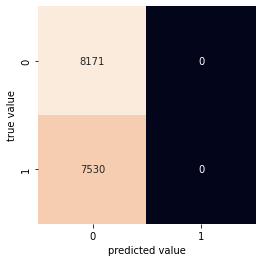

In [ ]:
print(" NN - tfIdf VECTORIZER\n")
map_nn=confusion_matrix(Y_test, pred14)
print(classification_report(Y_test, pred14))
sns.heatmap(map_nn, square=True, annot=True, cbar=False, fmt='')
plt.xlabel('predicted value')
plt.ylabel('true value');

 NN - Count VECTORIZER

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      8171
           1       0.98      0.99      0.99      7530

    accuracy                           0.99     15701
   macro avg       0.99      0.99      0.99     15701
weighted avg       0.99      0.99      0.99     15701



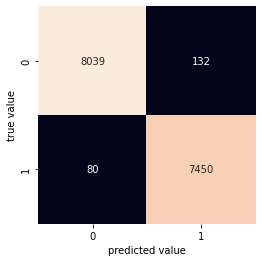

In [ ]:
print(" NN - Count VECTORIZER\n")
map_nn=confusion_matrix(Y_test_c, pred15)
print(classification_report(Y_test_c, pred15))
sns.heatmap(map_nn, square=True, annot=True, cbar=False, fmt='')
plt.xlabel('predicted value')
plt.ylabel('true value');